In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df = yf.download('GE', start='2010-09-10', end='2022-10-09')
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-09-10  76.487305  77.062393  75.768433  76.583153  56.733376   9731541
2010-09-13  77.589561  78.164658  76.918617  77.877106  57.691944  11749867
2010-09-14  77.541634  78.020882  77.206169  77.445786  57.372429  10049083
2010-09-15  77.014465  78.931442  76.535225  78.308426  58.011478  14305038
2010-09-16  77.541634  78.164658  77.206169  77.781258  58.047245   9822142


In [ ]:
Y = df['Close'].values.reshape(-1, 1)
X = df[['High','Low']].values

In [ ]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

In [ ]:
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.20, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2432, 2)
(609, 2)
(2432, 1)
(609, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
76/76 [==============================] - 8s 8ms/step - loss: 0.1092
Epoch 2/200
76/76 [==============================] - 1s 9ms/step - loss: 0.0088
Epoch 3/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0061
Epoch 4/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0046
Epoch 5/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0040
Epoch 6/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0035
Epoch 7/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0032
Epoch 8/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0029
Epoch 9/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0029
Epoch 10/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 11/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 12/200
76/76 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 13/200
76/76 [=================

In [ ]:
A = model.predict(X_test)

20/20 [==============================] - 2s 3ms/step


In [ ]:
A_inverse = scaler_Y.inverse_transform(A)
y_test_inverse = scaler_Y.inverse_transform(y_test)

In [ ]:
dates = df.index[-len(y_test):]

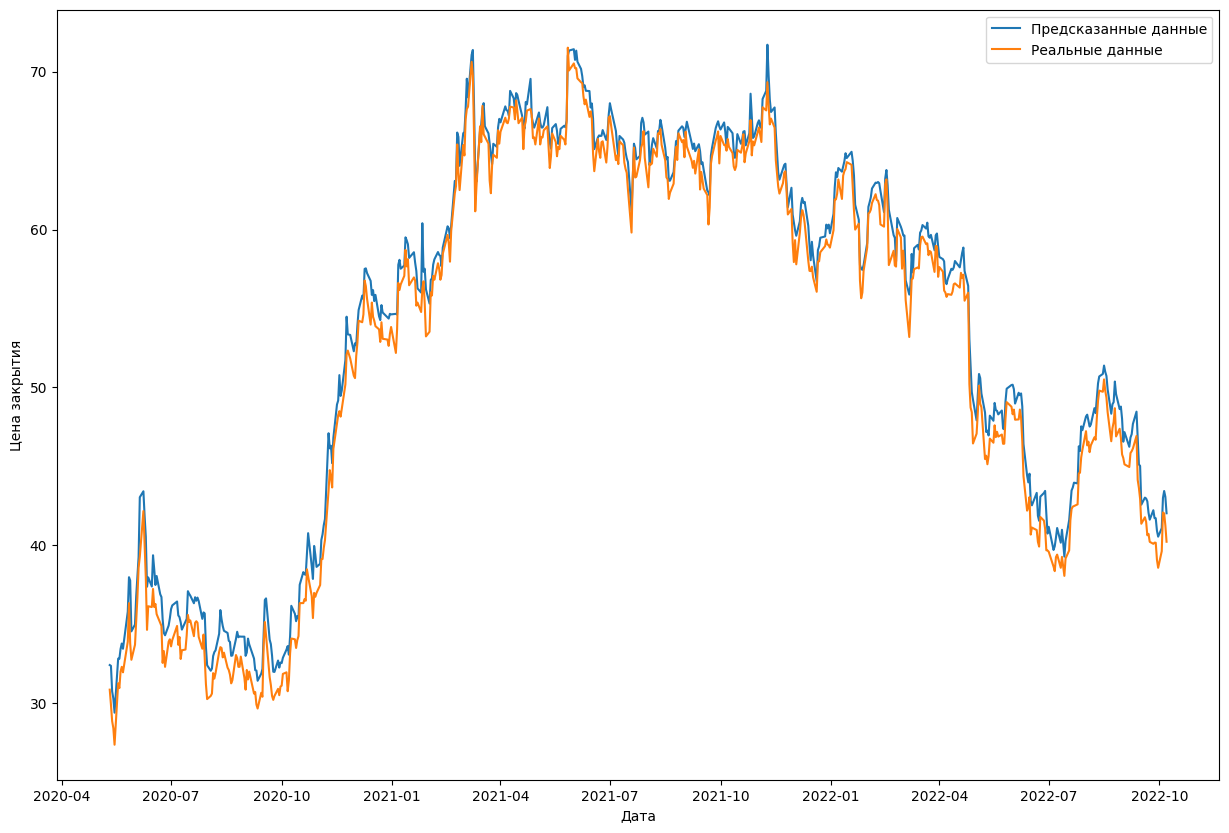

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(dates,A_inverse, label='Предсказанные данные')
plt.plot(dates,y_test_inverse, label='Реальные данные')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()


In [ ]:
X.shape

(3041, 2)

In [ ]:
Y.shape

(3041,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
N=1500
X_test = X[N:]
y_test = Y[N:]
X_train = X[0:N]
y_train = Y[0:N]

In [ ]:
print(X_train.shape)

(1500, 2)


In [ ]:
print(X_test.shape)

(1541, 2)


In [ ]:
print(y_train.shape)

(1500,)


In [ ]:
print(y_test.shape)

(1541,)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
47/47 [==============================] - 0s 9ms/step - loss: 71.7155
Epoch 2/50
47/47 [==============================] - 0s 9ms/step - loss: 74.2828
Epoch 3/50
47/47 [==============================] - 0s 9ms/step - loss: 78.6081
Epoch 4/50
47/47 [==============================] - 0s 9ms/step - loss: 82.2857
Epoch 5/50
47/47 [==============================] - 0s 8ms/step - loss: 74.9985
Epoch 6/50
47/47 [==============================] - 0s 9ms/step - loss: 73.4980
Epoch 7/50
47/47 [==============================] - 0s 9ms/step - loss: 75.2718
Epoch 8/50
47/47 [==============================] - 0s 9ms/step - loss: 71.5422
Epoch 9/50
47/47 [==============================] - 0s 8ms/step - loss: 80.9294
Epoch 10/50
47/47 [==============================] - 1s 12ms/step - loss: 69.4232
Epoch 11/50
47/47 [==============================] - 1s 11ms/step - loss: 86.1893
Epoch 12/50
47/47 [==============================] - 1s 13ms/step - loss: 69.7587
Epoch 13/50
47/47 [===============

In [ ]:
A = model.predict(X_test)

49/49 [==============================] - 0s 3ms/step


In [ ]:
np.sum((A-y_test)**2)

964543142.9615165

In [ ]:
dates = df.index
print(dates)

DatetimeIndex(['2010-09-10', '2010-09-13', '2010-09-14', '2010-09-15',
               '2010-09-16', '2010-09-17', '2010-09-20', '2010-09-21',
               '2010-09-22', '2010-09-23',
               ...
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07'],
              dtype='datetime64[ns]', name='Date', length=3041, freq=None)


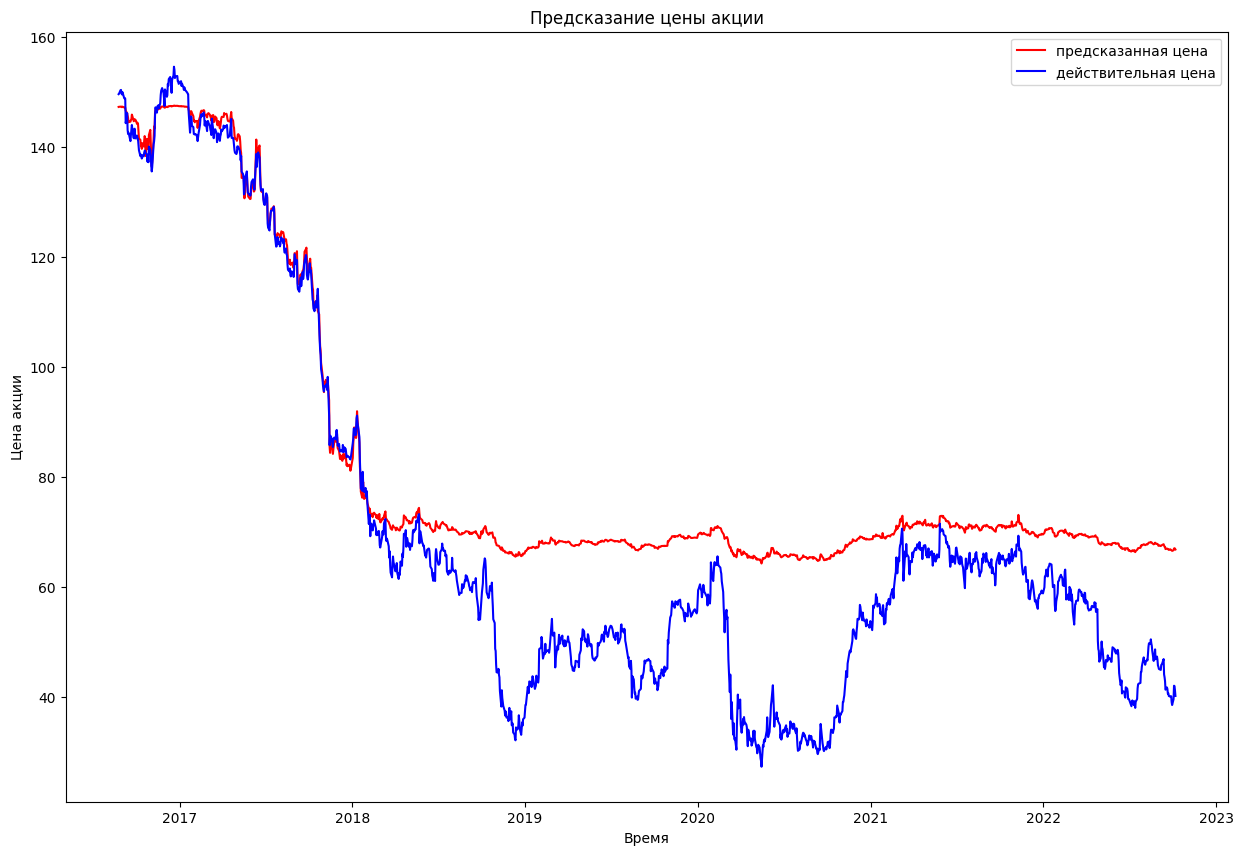

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dates[N:],A, color = 'red',label='предсказанная цена')
plt.plot(dates[N:],y_test,color = 'blue',label='действительная цена')
plt.title('Предсказание цены акции')
plt.xlabel('Время')
plt.ylabel('Цена акции')
plt.legend()


In [ ]:
print(A)

[[111.84166]
 [111.84166]
 [111.84166]
 ...
 [111.84165]
 [111.84165]
 [111.84165]]
